# Introduction
This code demonstrates a comprehensive data analysis, visualization, and machine learning model comparison to understand and predict students' academic performance in various subjects based on the hours spent studying. The dataset consists of six students, five subjects, and the corresponding hours spent studying and marks obtained by each student.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

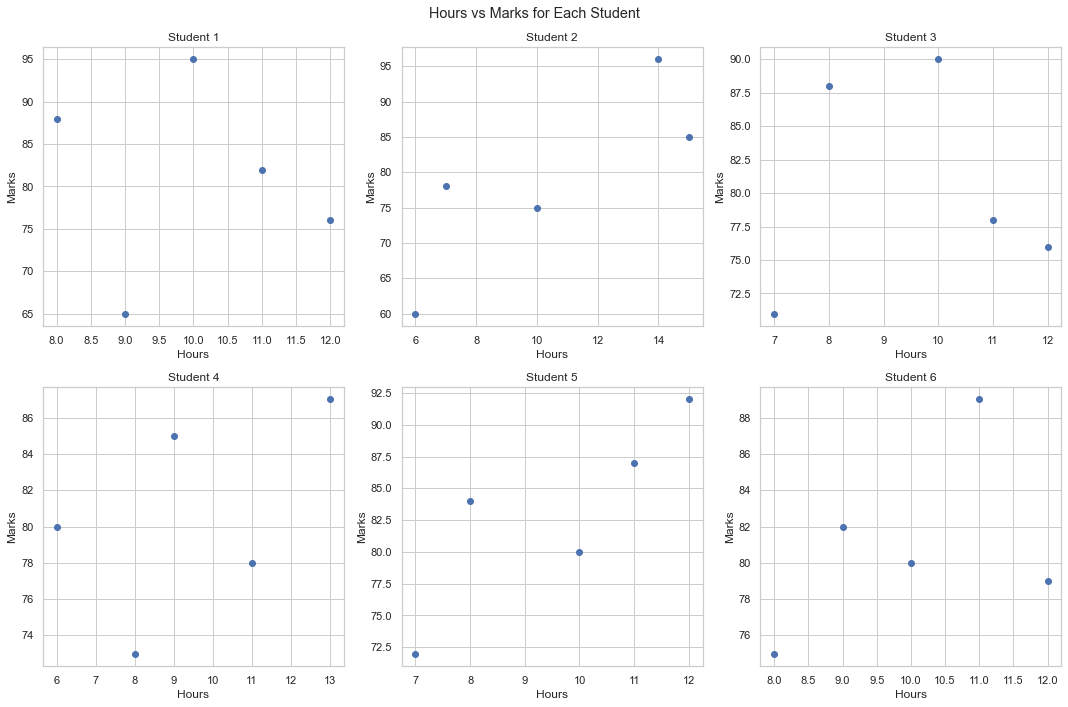

Descriptive statistics:
       Hours  Marks
count  30.00  30.00
mean    9.83  80.87
std     2.29   8.30
min     6.00  60.00
25%     8.00  76.00
50%    10.00  80.00
75%    11.00  87.00
max    15.00  96.00


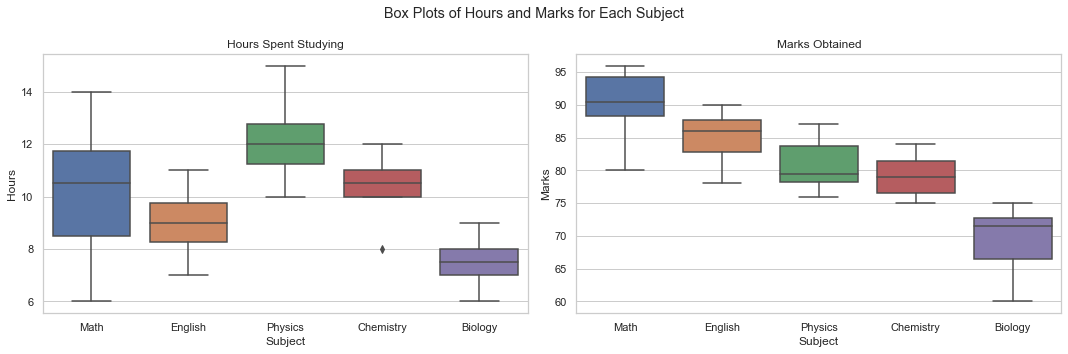

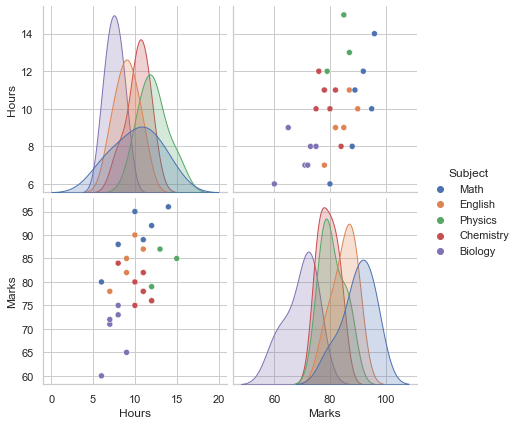

In [34]:
# Input data
students = ['Student 1', 'Student 2', 'Student 3', 'Student 4', 'Student 5', 'Student 6']
subjects = ['Math', 'English', 'Physics', 'Chemistry', 'Biology']
hours = [
    [10, 8, 12, 11, 9],
    [14, 7, 15, 10, 6],
    [8, 10, 11, 12, 7],
    [6, 9, 13, 11, 8],
    [12, 11, 10, 8, 7],
    [11, 9, 12, 10, 8]
]
marks = [
    [95, 88, 76, 82, 65],
    [96, 78, 85, 75, 60],
    [88, 90, 78, 76, 71],
    [80, 85, 87, 78, 73],
    [92, 87, 80, 84, 72],
    [89, 82, 79, 80, 75]
]


# Convert the data into a DataFrame
data = {
    'Student': np.repeat(students, len(subjects)),
    'Subject': subjects * len(students),
    'Hours': np.array(hours).flatten(),
    'Marks': np.array(marks).flatten()
}

df = pd.DataFrame(data)

# Data analysis and visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Hours vs Marks for Each Student')

for idx, student in enumerate(students):
    student_data = df[df['Student'] == student]
    ax = axes[idx // 3, idx % 3]
    ax.scatter(student_data['Hours'], student_data['Marks'])
    ax.set_xlabel('Hours')
    ax.set_ylabel('Marks')
    ax.set_title(student)

plt.tight_layout()
plt.show()


# Descriptive statistics
print("Descriptive statistics:")
print(df[['Hours', 'Marks']].describe().round(2))

# Box plot of hours and marks for each subject
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Box Plots of Hours and Marks for Each Subject')

sns.boxplot(x='Subject', y='Hours', data=df, ax=ax1)
ax1.set_title('Hours Spent Studying')

sns.boxplot(x='Subject', y='Marks', data=df, ax=ax2)
ax2.set_title('Marks Obtained')

plt.tight_layout()
plt.show()

# Scatter plot matrix of hours and marks for all students and subjects
sns.pairplot(df, hue='Subject', diag_kind='kde', height=3)
plt.show()

In [33]:
# Prepare the data for modeling
X = df['Hours'].values.reshape(-1, 1)
y = df['Marks'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='linear')
}

# Train, predict, and evaluate each model
best_model = None
best_r2 = float('-inf')

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the results
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R2 Score: {r2:.2f}\n")
    
    # Update the best model if necessary
    if r2 > best_r2:
        best_r2 = r2
        best_model = name

print(f"The best model is {best_model} with R2 score of {best_r2:.2f}.")

Linear Regression:
  Mean Squared Error: 61.00
  R2 Score: 0.19

Random Forest Regressor:
  Mean Squared Error: 67.86
  R2 Score: 0.10

Support Vector Regression:
  Mean Squared Error: 63.61
  R2 Score: 0.16

The best model is Linear Regression with R2 score of 0.19.


# Conclusion
In conclusion, this code effectively explores the relationship between study hours and academic performance, providing valuable insights through various visualizations. By comparing and evaluating three different machine learning models, the most suitable model for predicting students' marks based on their study hours is identified, aiding in further analysis or decision-making processes.
